COBIFY: A data analysis about fuel comsuption and what is the best possible according with some features. 

In [92]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [40]:
df1 = pd.read_csv('data/measurements.csv')
df1.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [42]:
df2 = pd.read_excel('data/measurements2.xlsx')
df2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [82]:
frames = [df1 , df2]
df3 = pd.concat(frames)

df3.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [83]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       776 non-null    object
 1   consume        776 non-null    object
 2   speed          776 non-null    int64 
 3   temp_inside    752 non-null    object
 4   temp_outside   776 non-null    int64 
 5   specials       186 non-null    object
 6   gas_type       776 non-null    object
 7   AC             776 non-null    int64 
 8   rain           776 non-null    int64 
 9   sun            776 non-null    int64 
 10  refill liters  26 non-null     object
 11  refill gas     26 non-null     object
dtypes: int64(5), object(7)
memory usage: 78.8+ KB


In [84]:
df3 = df3.drop('specials', axis=1)
df3 = df3.drop('temp_inside', axis=1)

In [85]:
def comma_converter(x):
    if type(x) == str and ',' in x:
        a = x.split(',')
        return float(a[0] + '.' + a[1])
    else:
        return float(x)

In [86]:
#As we can see, we need to transform some of the columns into floats like: distance, consume, refill liters...

df3['distance'] = df3['distance'].apply(comma_converter)
df3['consume'] = df3['consume'].apply(comma_converter)
df3['temp_outside'] = df3['temp_outside'].apply(comma_converter)
df3['refill liters'] = df3['refill liters'].apply(comma_converter)


In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 387
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       776 non-null    float64
 1   consume        776 non-null    float64
 2   speed          776 non-null    int64  
 3   temp_outside   776 non-null    float64
 4   gas_type       776 non-null    object 
 5   AC             776 non-null    int64  
 6   rain           776 non-null    int64  
 7   sun            776 non-null    int64  
 8   refill liters  26 non-null     float64
 9   refill gas     26 non-null     object 
dtypes: float64(4), int64(4), object(2)
memory usage: 66.7+ KB


In [89]:
#Finally I convert 'gas_type' to a numeric value: 0=E10 and 1=SP98

df3['gas_type'] = df3['gas_type'].map({'SP98': 1, 'E10': 0})

In [101]:
df3['km_absolute'] = df3['distance'].cumsum()
df3['consume_liter'] = (df3['consume']*df['distance'])/100

In [102]:
df3

,distance,consume,speed,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,km_absolute,consume_liter
0,28.0,5.0,26,12.0,0,0,0,0,45.0,E10,28.0,1.4000
1,12.0,4.2,30,13.0,0,0,0,0,NaN,NaN,40.0,0.5040
2,11.2,5.5,38,15.0,0,0,0,0,NaN,NaN,51.2,0.6160
3,12.9,3.9,36,14.0,0,0,0,0,NaN,NaN,64.1,0.5031
4,18.5,4.5,46,15.0,0,0,0,0,NaN,NaN,82.6,0.8325
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,18.0,1,0,0,0,NaN,NaN,15188.4,NaN
384,16.1,4.3,38,31.0,1,1,0,0,NaN,NaN,15204.5,NaN
385,16.0,3.8,45,19.0,1,0,0,0,NaN,NaN,15220.5,NaN
386,15.4,4.6,42,31.0,1,1,0,0,NaN,NaN,15235.9,NaN


Once I have all clean and ready we are going to find connections between the features:

Text(26.27299632352942, 0.5, 'consume [l/100km]')

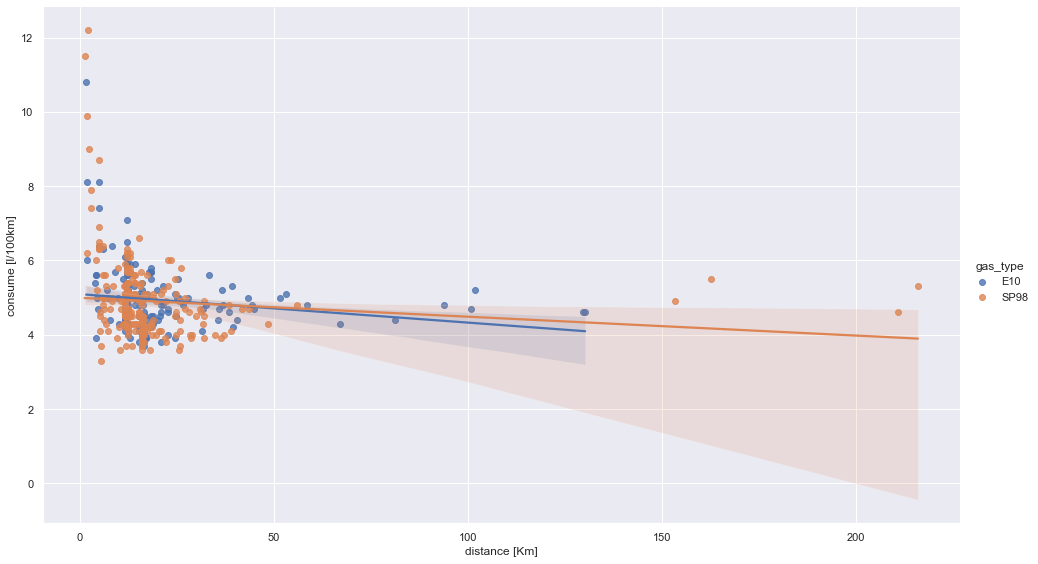

In [96]:
#Consume vs Distance
sns.lmplot(data = df, x = 'distance', y = 'consume', hue = 'gas_type', height=8,aspect=1.7)
plt.xlabel('distance [Km]')
plt.ylabel('consume [l/100km]')

Text(26.27299632352942, 0.5, 'consume [l/100km]')

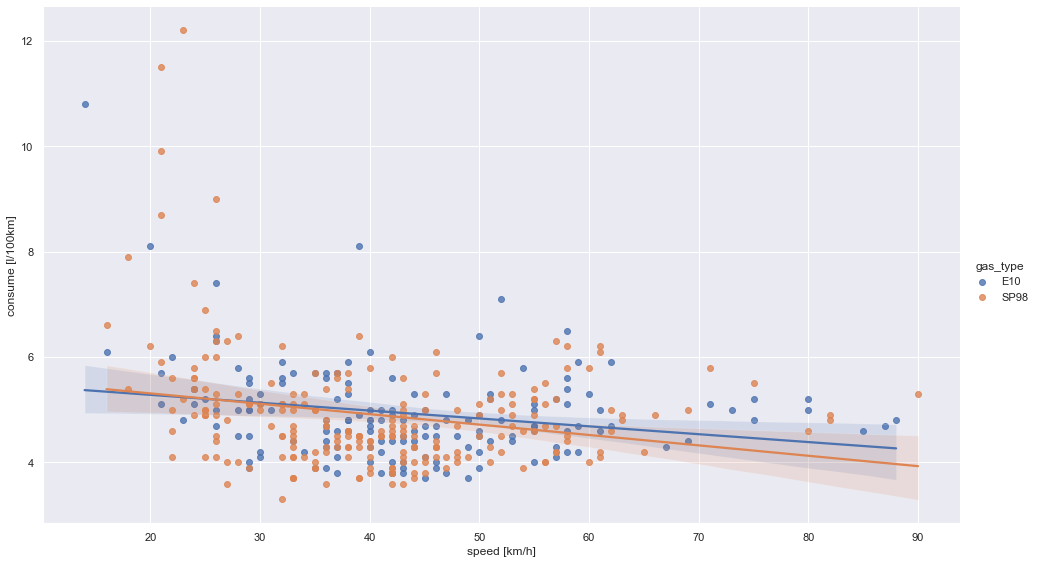

In [98]:
#Consume vs Speed:

sns.lmplot(data=df, x = 'speed',y =  'consume',hue = 'gas_type', height=8, aspect=1.7)
plt.xlabel('speed [km/h]')
plt.ylabel('consume [l/100km]')

In [103]:
km_e10 = df[df['gas_type'] == 'E10']['distance'].sum()
km_sp98 = df[df['gas_type'] == 'SP98']['distance'].sum()

avg_e10 = df[df['gas_type'] == 'E10']['distance'].mean()
avg_sp98 = df[df['gas_type'] == 'SP98']['distance'].mean()

std_e10 = df[df['gas_type'] == 'E10']['distance'].std()
std_sp98 = df[df['gas_type'] == 'SP98']['distance'].std()

print('DISTANCES:')
print('Kilometers with E10: ' + str(km_e10))
print('Kilometers with SP98: ' + str(km_sp98))
print('Average distance with E10: ' + str(avg_e10))
print('Average distance with SP98: ' + str(avg_sp98))
print('Deviation of the distances with E10: ' + str(std_e10))
print('Deviation of the distances with SP98: ' + str(std_sp98))
print('\n')
print(100*'*')
print('\n')
print('SPEED:')
avg_sp_e10 = df[df['gas_type'] == 'E10']['speed'].mean()
avg_sp_sp98 = df[df['gas_type'] == 'SP98']['speed'].mean()

std_sp_e10 = df[df['gas_type'] == 'E10']['speed'].std()
std_sp_sp98 = df[df['gas_type'] == 'SP98']['speed'].std()

print('Average speed with E10: ' + str(avg_sp_e10))
print('Average speed with SP98: ' + str(avg_sp_sp98))
print('Deviation of the speed with E10: ' + str(std_sp_e10))
print('Deviation of the speed with SP98: ' + str(std_sp_sp98))

DISTANCES:
Kilometers with E10: 3375.4
Kilometers with SP98: 4249.900000000001
Average distance with E10: 21.096250000000005
Average distance with SP98: 18.639912280701765
Deviation of the distances with E10: 20.3072341650448
Deviation of the distancees with SP98: 24.179598455931174


****************************************************************************************************


SPEED:
Average speed with E10: 43.50625
Average speed with SP98: 40.82017543859649
Deviation of the speed with E10: 14.055865641580723
Deviation of the speed with SP98: 13.155640948291438


Now, is time to aggregate the data:

We need to see how many liters are needed for a trip
and calculate the consumption from the refill volume.

In [109]:
num = df3['refill liters'].count()
num_list = []

for i in range(num):
    num_list.append(i)
num_list = num_list[::-1]
    
def refill_events(x):
    if x > 0:
        return num_list.pop()
    else:
        pass

#Creating the event column  
 
df3['refill_event'] = df3['refill liters'].apply(refill_events)

In [111]:
df3['refill liters'].fillna(method = 'bfill', inplace = True)
df3['refill_event'].fillna(method = 'bfill', inplace = True)

In [112]:
consume_per_refill = df3.groupby('refill_event').agg({'consume_liter': sum, 'refill liters': np.mean, 'gas_type' : 'first', 'km_absolute': 'last','distance':sum})
consume_per_refill.sort_values('km_absolute', inplace= True)

In [113]:
consume_per_refill

,consume_liter,refill liters,gas_type,km_absolute,distance
refill_event,,,,,
0.0,1.4000,45.0,0,28.0,28.0
1.0,32.7292,37.6,0,662.3,634.3
2.0,29.8031,37.7,1,1262.8,600.5
3.0,24.4745,45.0,1,1725.4,462.6
4.0,24.7634,38.0,1,2192.3,466.9
5.0,33.8630,38.3,0,2887.4,695.1
6.0,33.9869,10.0,0,3609.2,721.8
7.0,0.5082,39.0,1,3621.3,12.1
8.0,32.3618,39.0,1,4317.9,696.6


Text(0, 0.5, '[liter]')

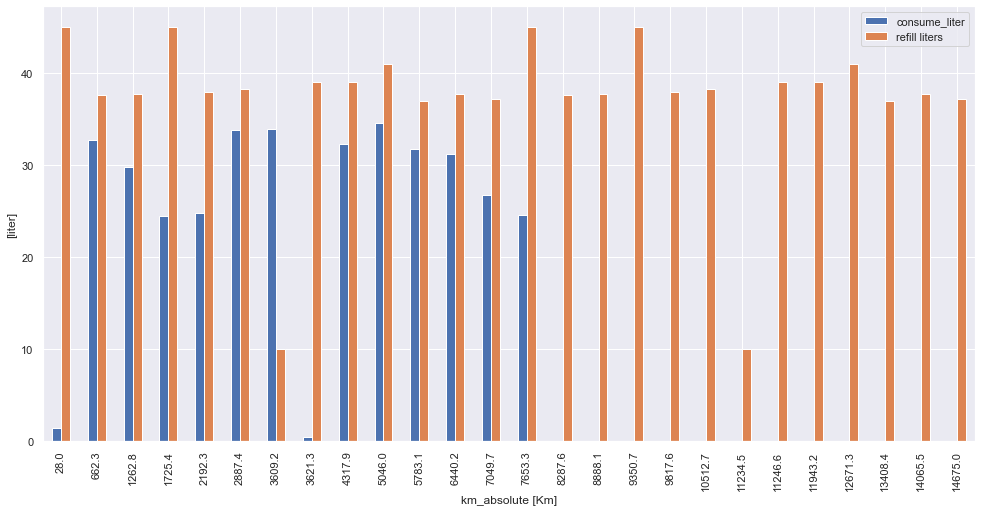

In [114]:
consume_per_refill.round(2).plot('km_absolute',['consume_liter','refill liters'], kind='bar',figsize=(16.7,8))
plt.xlabel('km_absolute [Km]')
plt.ylabel('[liter]')

We can export to a SQL Database:

In [118]:
import sqlite3
conn = sqlite3.connect('comsuption') 
c = conn.cursor()

In [119]:
df3.to_sql('comsuption', conn, if_exists='replace', index = False)

c:\Users\amara\anaconda3\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(
